In [96]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# accuracy score
from sklearn.metrics import accuracy_score

import csv

# Acquire Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N':0,'Y':1}).astype(int)

In [5]:
train_df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int32
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.0+ KB


In [7]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [8]:
train_df.describe(include = ['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,614,601,611,599,614,582,614
unique,614,2,2,4,2,2,3
top,LP001888,Male,Yes,0,Graduate,No,Semiurban
freq,1,489,398,345,480,500,233


# Correlation

Observations:
- Include features App+CoApp,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Property_Area .
- Drop features Self_Employed,Loan_ID,Dependents.

In [9]:
train_df[['Gender', 'Loan_Status']].groupby(['Gender'], as_index=False).mean().sort_values(by='Loan_Status', ascending=False)

,Gender,Loan_Status
1,Male,0.693252
0,Female,0.669643


In [10]:
train_df[['Married', 'Loan_Status']].groupby(['Married'], as_index=False).mean().sort_values(by='Loan_Status', ascending=False)

,Married,Loan_Status
1,Yes,0.716080
0,No,0.629108


In [11]:
train_df[['Dependents', 'Loan_Status']].groupby(['Dependents'], as_index=False).mean().sort_values(by='Loan_Status', ascending=False)

,Dependents,Loan_Status
2,2,0.752475
0,0,0.689855
1,1,0.647059
3,3+,0.647059


In [12]:
train_df[['Education', 'Loan_Status']].groupby(['Education'], as_index=False).mean().sort_values(by='Loan_Status', ascending=False)

,Education,Loan_Status
0,Graduate,0.708333
1,Not Graduate,0.611940


In [13]:
train_df[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed'], as_index=False).mean().sort_values(by='Loan_Status', ascending=False)

,Self_Employed,Loan_Status
0,No,0.686000
1,Yes,0.682927


In [14]:
train_df[['Property_Area', 'Loan_Status']].groupby(['Property_Area'], as_index=False).mean().sort_values(by='Loan_Status', ascending=False)

,Property_Area,Loan_Status
1,Semiurban,0.768240
2,Urban,0.658416
0,Rural,0.614525


In [15]:
train_df[['Credit_History', 'Loan_Status']].groupby(['Credit_History'], as_index=False).mean().sort_values(by='Loan_Status', ascending=False)

,Credit_History,Loan_Status
1,1.0,0.795789
0,0.0,0.078652


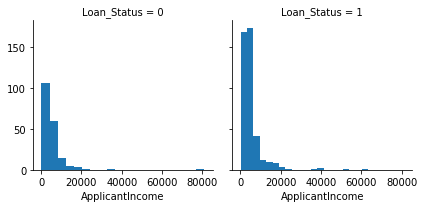

In [16]:
g = sns.FacetGrid(train_df, col='Loan_Status')
g.map(plt.hist, 'ApplicantIncome', bins=20)

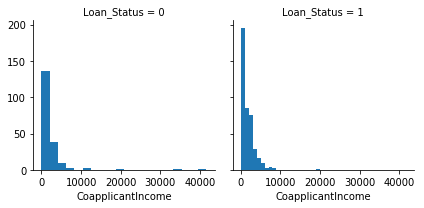

In [17]:
g = sns.FacetGrid(train_df, col='Loan_Status')
g.map(plt.hist, 'CoapplicantIncome', bins=20)

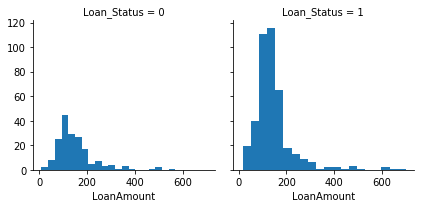

In [18]:
g = sns.FacetGrid(train_df, col='Loan_Status')
g.map(plt.hist, 'LoanAmount', bins=20)

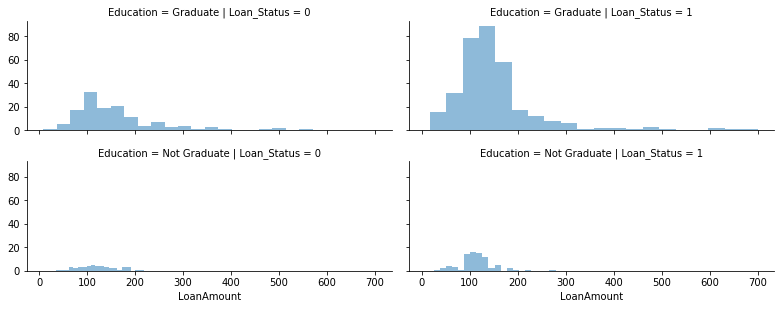

In [19]:
grid = sns.FacetGrid(train_df, col='Loan_Status', row='Education', size=2.2, aspect=2.5)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=20)

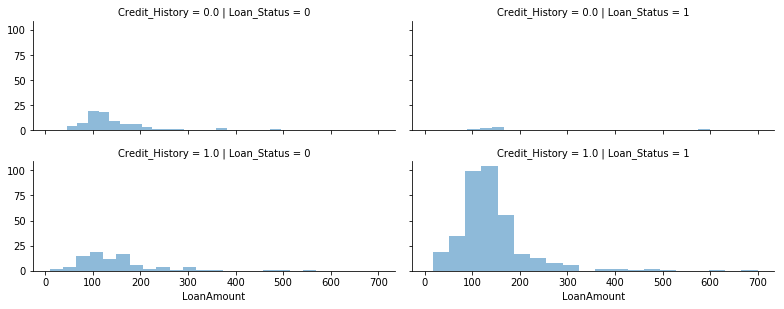

In [20]:
grid = sns.FacetGrid(train_df, col='Loan_Status', row='Credit_History', size=2.2, aspect=2.5)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=20)

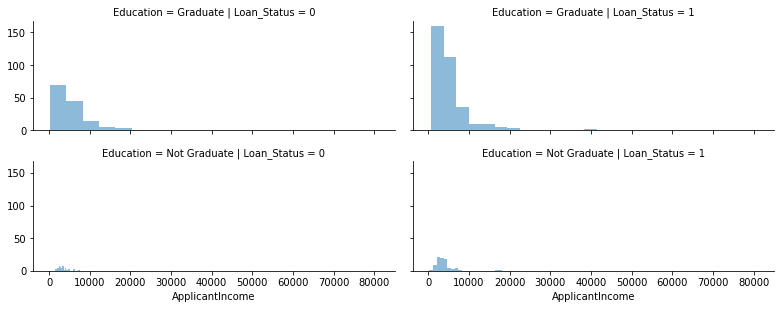

In [21]:
grid = sns.FacetGrid(train_df, col='Loan_Status', row='Education', size=2.2, aspect=2.5)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=20)

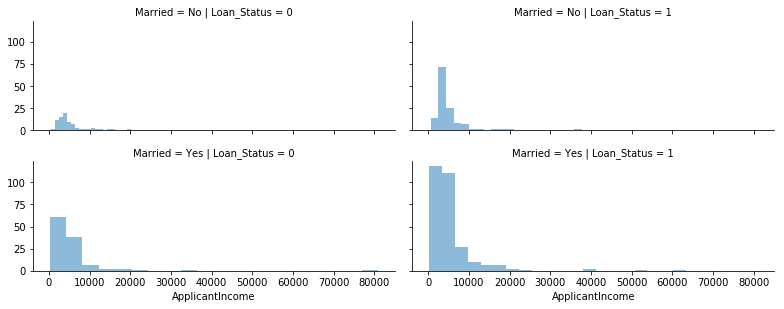

In [22]:
grid = sns.FacetGrid(train_df, col='Loan_Status', row='Married', size=2.2, aspect=2.5)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=20)

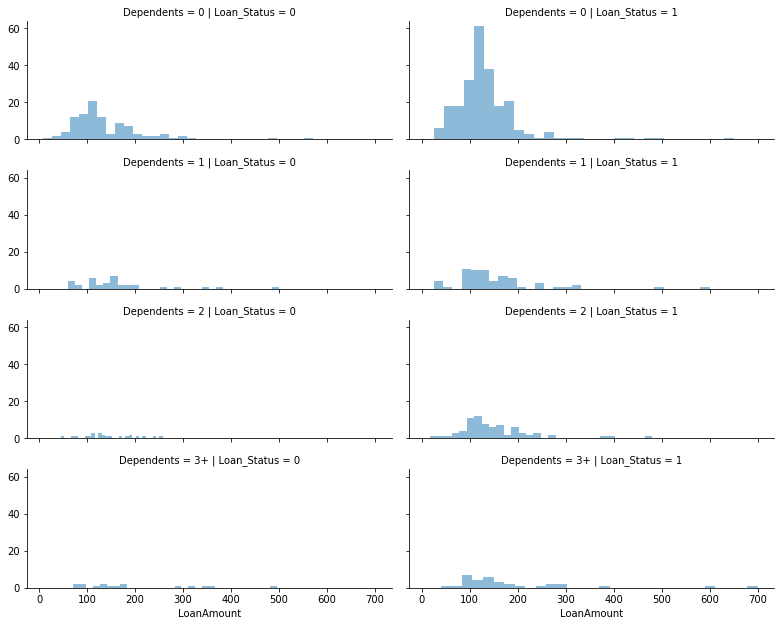

In [23]:
grid = sns.FacetGrid(train_df, col='Loan_Status', row='Dependents', size=2.2, aspect=2.5)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=30)

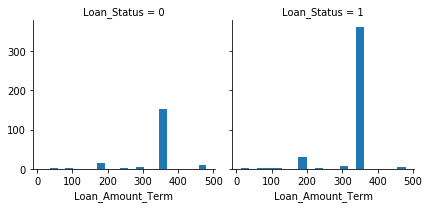

In [24]:
g = sns.FacetGrid(train_df, col='Loan_Status')
g.map(plt.hist, 'Loan_Amount_Term', bins=20)

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda2\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


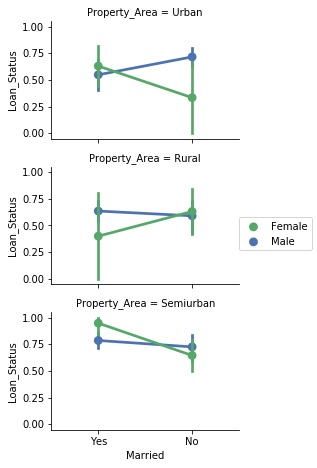

In [25]:
grid = sns.FacetGrid(train_df, row='Property_Area', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Married', 'Loan_Status', 'Gender', palette='deep')
grid.add_legend()

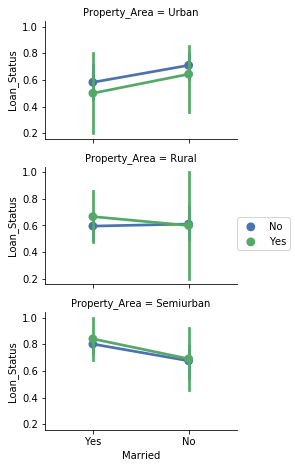

In [26]:
grid = sns.FacetGrid(train_df, row='Property_Area', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Married', 'Loan_Status', 'Self_Employed', palette='deep')
grid.add_legend()

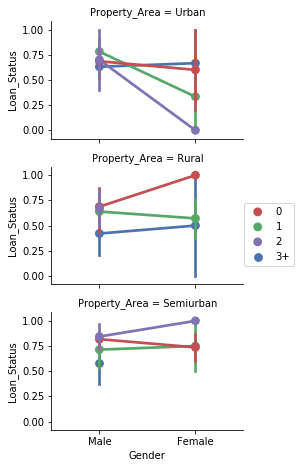

In [27]:
grid = sns.FacetGrid(train_df, row='Property_Area', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Gender', 'Loan_Status', 'Dependents', palette='deep')
grid.add_legend()

# Dropping features

In [28]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [29]:
train_df = train_df.drop(['Loan_ID','Self_Employed','Dependents'],axis=1)
test_df = test_df.drop(['Self_Employed','Dependents'],axis=1)

In [30]:
train_df.head()

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,1


In [31]:
test_df.head()

,Loan_ID,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,Graduate,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,Graduate,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,Graduate,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,Graduate,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,Not Graduate,3276,0,78.0,360.0,1.0,Urban


In [32]:
train_df['App+Coapp'] = train_df['ApplicantIncome']+train_df['CoapplicantIncome']

In [33]:
test_df['App+Coapp'] = test_df['ApplicantIncome']+test_df['CoapplicantIncome']

In [34]:
train_df = train_df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

In [35]:
test_df = test_df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

In [36]:
train_df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,App+Coapp
count,592.000000,600.00000,564.000000,614.000000,614.000000
mean,146.412162,342.00000,0.842199,0.687296,7024.705081
std,85.587325,65.12041,0.364878,0.463973,6458.663872
min,9.000000,12.00000,0.000000,0.000000,1442.000000
25%,100.000000,360.00000,1.000000,0.000000,4166.000000
50%,128.000000,360.00000,1.000000,1.000000,5416.500000
75%,168.000000,360.00000,1.000000,1.000000,7521.750000
max,700.000000,480.00000,1.000000,1.000000,81000.000000


In [37]:
train_df.describe(include=['O'])

,Gender,Married,Education,Property_Area
count,601,611,614,614
unique,2,2,2,3
top,Male,Yes,Graduate,Semiurban
freq,489,398,480,233


# Completing the features

In [38]:
freq_marr = train_df.Married.dropna().mode()[0]

In [39]:
freq_marr

'Yes'

In [40]:
train_df['Married'] = train_df['Married'].fillna(freq_marr)

In [41]:
train_df.describe(include=['O'])

,Gender,Married,Education,Property_Area
count,601,614,614,614
unique,2,2,2,3
top,Male,Yes,Graduate,Semiurban
freq,489,401,480,233


In [42]:
train_df['Gender'] = train_df['Gender'].fillna('Male')

In [43]:
train_df.describe(include=['O'])

,Gender,Married,Education,Property_Area
count,614,614,614,614
unique,2,2,2,3
top,Male,Yes,Graduate,Semiurban
freq,502,401,480,233


In [44]:
test_df.describe(include=['O'])

,Loan_ID,Gender,Married,Education,Property_Area
count,367,356,367,367,367
unique,367,2,2,2,3
top,LP002117,Male,Yes,Graduate,Urban
freq,1,286,233,283,140


In [45]:
test_df['Gender'] = test_df['Gender'].fillna('Male')

In [46]:
test_df['Married'] = test_df['Married'].fillna('Yes')

In [47]:
test_df.describe(include=['O'])

,Loan_ID,Gender,Married,Education,Property_Area
count,367,367,367,367,367
unique,367,2,2,2,3
top,LP002117,Male,Yes,Graduate,Urban
freq,1,297,233,283,140


In [48]:
train_df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,App+Coapp
count,592.000000,600.00000,564.000000,614.000000,614.000000
mean,146.412162,342.00000,0.842199,0.687296,7024.705081
std,85.587325,65.12041,0.364878,0.463973,6458.663872
min,9.000000,12.00000,0.000000,0.000000,1442.000000
25%,100.000000,360.00000,1.000000,0.000000,4166.000000
50%,128.000000,360.00000,1.000000,1.000000,5416.500000
75%,168.000000,360.00000,1.000000,1.000000,7521.750000
max,700.000000,480.00000,1.000000,1.000000,81000.000000


In [49]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(146.412162)

In [50]:
train_df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,App+Coapp
count,614.000000,600.00000,564.000000,614.000000,614.000000
mean,146.412162,342.00000,0.842199,0.687296,7024.705081
std,84.037468,65.12041,0.364878,0.463973,6458.663872
min,9.000000,12.00000,0.000000,0.000000,1442.000000
25%,100.250000,360.00000,1.000000,0.000000,4166.000000
50%,129.000000,360.00000,1.000000,1.000000,5416.500000
75%,164.750000,360.00000,1.000000,1.000000,7521.750000
max,700.000000,480.00000,1.000000,1.000000,81000.000000


In [51]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(342.00000)

In [52]:
train_df['Credit_History'] = train_df['Credit_History'].fillna(1)

In [53]:
train_df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,App+Coapp
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,146.412162,342.000000,0.855049,0.687296,7024.705081
std,84.037468,64.372489,0.352339,0.463973,6458.663872
min,9.000000,12.000000,0.000000,0.000000,1442.000000
25%,100.250000,360.000000,1.000000,0.000000,4166.000000
50%,129.000000,360.000000,1.000000,1.000000,5416.500000
75%,164.750000,360.000000,1.000000,1.000000,7521.750000
max,700.000000,480.000000,1.000000,1.000000,81000.000000


In [54]:
test_df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,App+Coapp
count,362.000000,361.000000,338.000000,367.000000
mean,136.132597,342.537396,0.825444,6375.177112
std,61.366652,65.156643,0.380150,5199.423594
min,28.000000,6.000000,0.000000,1760.000000
25%,100.250000,360.000000,1.000000,4156.000000
50%,125.000000,360.000000,1.000000,5205.000000
75%,158.000000,360.000000,1.000000,6980.000000
max,550.000000,480.000000,1.000000,72529.000000


In [55]:
test_df['Credit_History'] = test_df['Credit_History'].fillna(1)
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(342.537396)
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(136.132597)

In [56]:
test_df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,App+Coapp
count,367.000000,367.000000,367.000000,367.000000
mean,136.132597,342.537396,0.839237,6375.177112
std,60.946040,64.620366,0.367814,5199.423594
min,28.000000,6.000000,0.000000,1760.000000
25%,101.000000,360.000000,1.000000,4156.000000
50%,126.000000,360.000000,1.000000,5205.000000
75%,157.500000,360.000000,1.000000,6980.000000
max,550.000000,480.000000,1.000000,72529.000000


# Converting the catagorical features into numerical features

In [57]:
train_df.describe(include=['O'])

,Gender,Married,Education,Property_Area
count,614,614,614,614
unique,2,2,2,3
top,Male,Yes,Graduate,Semiurban
freq,502,401,480,233


In [58]:
train_df['Gender'] = train_df['Gender'].map({'Male':0,'Female':1}).astype(int)
train_df['Married'] = train_df['Married'].map({'No':0,'Yes':1}).astype(int)
train_df['Education'] = train_df['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)
train_df['Property_Area'] = train_df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype(int)



In [59]:
train_df.describe()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App+Coapp
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.781759,146.412162,342.000000,0.855049,1.037459,0.687296,7024.705081
std,0.386497,0.476373,0.413389,84.037468,64.372489,0.352339,0.787482,0.463973,6458.663872
min,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1442.000000
25%,0.000000,0.000000,1.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4166.000000
50%,0.000000,1.000000,1.000000,129.000000,360.000000,1.000000,1.000000,1.000000,5416.500000
75%,0.000000,1.000000,1.000000,164.750000,360.000000,1.000000,2.000000,1.000000,7521.750000
max,1.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,1.000000,81000.000000


In [60]:
test_df['Gender'] = test_df['Gender'].map({'Male':0,'Female':1}).astype(int)
test_df['Married'] = test_df['Married'].map({'No':0,'Yes':1}).astype(int)
test_df['Education'] = test_df['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)
test_df['Property_Area'] = test_df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype(int)

In [61]:
test_df.describe()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,App+Coapp
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.190736,0.634877,0.771117,136.132597,342.537396,0.839237,1.079019,6375.177112
std,0.393417,0.482122,0.420687,60.946040,64.620366,0.367814,0.824337,5199.423594
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000,1760.000000
25%,0.000000,0.000000,1.000000,101.000000,360.000000,1.000000,0.000000,4156.000000
50%,0.000000,1.000000,1.000000,126.000000,360.000000,1.000000,1.000000,5205.000000
75%,0.000000,1.000000,1.000000,157.500000,360.000000,1.000000,2.000000,6980.000000
max,1.000000,1.000000,1.000000,550.000000,480.000000,1.000000,2.000000,72529.000000


In [62]:
train_df['LoanAmountBand'] = pd.cut(train_df['LoanAmount'], 5)
train_df[['LoanAmountBand', 'Loan_Status']].groupby(['LoanAmountBand'], as_index=False).mean().sort_values(by='LoanAmountBand', ascending=True)

,LoanAmountBand,Loan_Status
0,"(8.309, 147.2]",0.705446
1,"(147.2, 285.4]",0.664773
2,"(285.4, 423.6]",0.523810
3,"(423.6, 561.8]",0.625000
4,"(561.8, 700.0]",0.800000


In [63]:
train_df.loc[ train_df['LoanAmount'] <= 147.2, 'LoanAmount'] = 0
train_df.loc[(train_df['LoanAmount'] > 147.2) & (train_df['LoanAmount'] <= 285.4), 'LoanAmount'] = 1
train_df.loc[(train_df['LoanAmount'] > 285.4) & (train_df['LoanAmount'] <= 423.6), 'LoanAmount'] = 2
train_df.loc[(train_df['LoanAmount'] > 423.6) & (train_df['LoanAmount'] <= 561.8), 'LoanAmount'] = 3
train_df.loc[ train_df['LoanAmount'] > 561.8, 'LoanAmount'] = 4

In [64]:
train_df.head()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App+Coapp,LoanAmountBand
0,0,0,1,0.0,360.0,1.0,2,1,5849.0,"(8.309, 147.2]"
1,0,1,1,0.0,360.0,1.0,0,0,6091.0,"(8.309, 147.2]"
2,0,1,1,0.0,360.0,1.0,2,1,3000.0,"(8.309, 147.2]"
3,0,1,0,0.0,360.0,1.0,2,1,4941.0,"(8.309, 147.2]"
4,0,0,1,0.0,360.0,1.0,2,1,6000.0,"(8.309, 147.2]"


In [65]:
test_df.loc[ test_df['LoanAmount'] <= 147.2, 'LoanAmount'] = 0
test_df.loc[(test_df['LoanAmount'] > 147.2) & (test_df['LoanAmount'] <= 285.4), 'LoanAmount'] = 1
test_df.loc[(test_df['LoanAmount'] > 285.4) & (test_df['LoanAmount'] <= 423.6), 'LoanAmount'] = 2
test_df.loc[(test_df['LoanAmount'] > 423.6) & (test_df['LoanAmount'] <= 561.8), 'LoanAmount'] = 3
test_df.loc[ test_df['LoanAmount'] > 561.8, 'LoanAmount']=4

In [66]:
train_df = train_df.drop(['LoanAmountBand'],axis=1)

In [67]:
train_df.head()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App+Coapp
0,0,0,1,0.0,360.0,1.0,2,1,5849.0
1,0,1,1,0.0,360.0,1.0,0,0,6091.0
2,0,1,1,0.0,360.0,1.0,2,1,3000.0
3,0,1,0,0.0,360.0,1.0,2,1,4941.0
4,0,0,1,0.0,360.0,1.0,2,1,6000.0


In [68]:
test_df.head()

,Loan_ID,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,App+Coapp
0,LP001015,0,1,1,0.0,360.0,1.0,2,5720
1,LP001022,0,1,1,0.0,360.0,1.0,2,4576
2,LP001031,0,1,1,1.0,360.0,1.0,2,6800
3,LP001035,0,1,1,0.0,360.0,1.0,2,4886
4,LP001051,0,0,0,0.0,360.0,1.0,2,3276


In [69]:
train_df.describe()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App+Coapp
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.781759,0.426710,342.000000,0.855049,1.037459,0.687296,7024.705081
std,0.386497,0.476373,0.413389,0.699804,64.372489,0.352339,0.787482,0.463973,6458.663872
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1442.000000
25%,0.000000,0.000000,1.000000,0.000000,360.000000,1.000000,0.000000,0.000000,4166.000000
50%,0.000000,1.000000,1.000000,0.000000,360.000000,1.000000,1.000000,1.000000,5416.500000
75%,0.000000,1.000000,1.000000,1.000000,360.000000,1.000000,2.000000,1.000000,7521.750000
max,1.000000,1.000000,1.000000,4.000000,480.000000,1.000000,2.000000,1.000000,81000.000000


In [70]:
train_df['LoanAmountBand'] = pd.cut(train_df['Loan_Amount_Term'], 5)
train_df[['LoanAmountBand', 'Loan_Status']].groupby(['LoanAmountBand'], as_index=False).mean().sort_values(by='LoanAmountBand', ascending=True)

,LoanAmountBand,Loan_Status
0,"(11.532, 105.6]",0.666667
1,"(105.6, 199.2]",0.680851
2,"(199.2, 292.8]",0.750000
3,"(292.8, 386.4]",0.695733
4,"(386.4, 480.0]",0.400000


In [71]:
train_df.loc[ train_df['Loan_Amount_Term'] <= 105.6, 'Loan_Amount_Term'] = 0
train_df.loc[(train_df['Loan_Amount_Term'] > 105.6) & (train_df['Loan_Amount_Term'] <= 199.2), 'Loan_Amount_Term'] = 1
train_df.loc[(train_df['Loan_Amount_Term'] > 199.2) & (train_df['Loan_Amount_Term'] <= 292.8), 'Loan_Amount_Term'] = 2
train_df.loc[(train_df['Loan_Amount_Term'] > 292.8) & (train_df['Loan_Amount_Term'] <= 386.4), 'Loan_Amount_Term'] = 3
train_df.loc[ train_df['Loan_Amount_Term'] > 386.4, 'Loan_Amount_Term'] = 4

In [72]:
test_df.loc[ test_df['Loan_Amount_Term'] <= 105.6, 'Loan_Amount_Term'] = 0
test_df.loc[(test_df['Loan_Amount_Term'] > 105.6) & (test_df['Loan_Amount_Term'] <= 199.2), 'Loan_Amount_Term'] = 1
test_df.loc[(test_df['Loan_Amount_Term'] > 199.2) & (test_df['Loan_Amount_Term'] <= 292.8), 'Loan_Amount_Term'] = 2
test_df.loc[(test_df['Loan_Amount_Term'] > 292.8) & (test_df['Loan_Amount_Term'] <= 386.4), 'Loan_Amount_Term'] = 3
test_df.loc[ test_df['Loan_Amount_Term'] > 386.4, 'Loan_Amount_Term'] = 4

In [73]:
train_df.describe()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App+Coapp
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.781759,0.426710,2.820847,0.855049,1.037459,0.687296,7024.705081
std,0.386497,0.476373,0.413389,0.699804,0.661568,0.352339,0.787482,0.463973,6458.663872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1442.000000
25%,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,4166.000000
50%,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,5416.500000
75%,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,7521.750000
max,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,1.000000,81000.000000


In [74]:
test_df.describe()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,App+Coapp
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.190736,0.634877,0.771117,0.356948,2.828338,0.839237,1.079019,6375.177112
std,0.393417,0.482122,0.420687,0.558686,0.653250,0.367814,0.824337,5199.423594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1760.000000
25%,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,4156.000000
50%,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,5205.000000
75%,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,6980.000000
max,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,2.000000,72529.000000


In [75]:
train_df.head()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App+Coapp,LoanAmountBand
0,0,0,1,0.0,3.0,1.0,2,1,5849.0,"(292.8, 386.4]"
1,0,1,1,0.0,3.0,1.0,0,0,6091.0,"(292.8, 386.4]"
2,0,1,1,0.0,3.0,1.0,2,1,3000.0,"(292.8, 386.4]"
3,0,1,0,0.0,3.0,1.0,2,1,4941.0,"(292.8, 386.4]"
4,0,0,1,0.0,3.0,1.0,2,1,6000.0,"(292.8, 386.4]"


In [76]:
train_df = train_df.drop(['LoanAmountBand'],axis=1)

In [77]:
train_df.head()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App+Coapp
0,0,0,1,0.0,3.0,1.0,2,1,5849.0
1,0,1,1,0.0,3.0,1.0,0,0,6091.0
2,0,1,1,0.0,3.0,1.0,2,1,3000.0
3,0,1,0,0.0,3.0,1.0,2,1,4941.0
4,0,0,1,0.0,3.0,1.0,2,1,6000.0


In [78]:
train_df['AppCoppBand'] = pd.cut(train_df['App+Coapp'], 5)
train_df[['AppCoppBand', 'Loan_Status']].groupby(['AppCoppBand'], as_index=False).mean().sort_values(by='AppCoppBand', ascending=True)

,AppCoppBand,Loan_Status
0,"(1362.442, 17353.6]",0.691525
1,"(17353.6, 33265.2]",0.600000
2,"(33265.2, 49176.8]",0.500000
3,"(49176.8, 65088.4]",1.000000
4,"(65088.4, 81000.0]",0.000000


In [79]:
train_df.loc[ train_df['App+Coapp'] <= 17353.6, 'App+Coapp'] = 0
train_df.loc[(train_df['App+Coapp'] > 17353.6) & (train_df['App+Coapp'] <= 33265.2), 'App+Coapp'] = 1
train_df.loc[(train_df['App+Coapp'] > 33265.2) & (train_df['App+Coapp'] <= 49176.8), 'App+Coapp'] = 2
train_df.loc[(train_df['App+Coapp'] > 49176.8) & (train_df['App+Coapp'] <= 65088.4), 'App+Coapp'] = 3
train_df.loc[ train_df['App+Coapp'] > 65088.4, 'App+Coapp'] = 4

In [80]:
test_df.loc[ test_df['App+Coapp'] <= 17353.6, 'App+Coapp'] = 0
test_df.loc[(test_df['App+Coapp'] > 17353.6) & (test_df['App+Coapp'] <= 33265.2), 'App+Coapp'] = 1
test_df.loc[(test_df['App+Coapp'] > 33265.2) & (test_df['App+Coapp'] <= 49176.8), 'App+Coapp'] = 2
test_df.loc[(test_df['App+Coapp'] > 49176.8) & (test_df['App+Coapp'] <= 65088.4), 'App+Coapp'] = 3
test_df.loc[ test_df['App+Coapp'] > 65088.4, 'App+Coapp'] = 4

In [81]:
train_df.describe()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App+Coapp
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.781759,0.426710,2.820847,0.855049,1.037459,0.687296,0.060261
std,0.386497,0.476373,0.413389,0.699804,0.661568,0.352339,0.787482,0.463973,0.339778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,1.000000,4.000000


In [82]:
train_df = train_df.drop(['AppCoppBand'],axis=1)

In [83]:
train_df.head()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App+Coapp
0,0,0,1,0.0,3.0,1.0,2,1,0.0
1,0,1,1,0.0,3.0,1.0,0,0,0.0
2,0,1,1,0.0,3.0,1.0,2,1,0.0
3,0,1,0,0.0,3.0,1.0,2,1,0.0
4,0,0,1,0.0,3.0,1.0,2,1,0.0


In [84]:
test_df.head()

,Loan_ID,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,App+Coapp
0,LP001015,0,1,1,0.0,3.0,1.0,2,0
1,LP001022,0,1,1,0.0,3.0,1.0,2,0
2,LP001031,0,1,1,1.0,3.0,1.0,2,0
3,LP001035,0,1,1,0.0,3.0,1.0,2,0
4,LP001051,0,0,0,0.0,3.0,1.0,2,0


# Model,Predict and Solve

In [90]:
X_train = train_df.drop(['Loan_Status'], axis=1)
Y_train = train_df["Loan_Status"]
X_test  = test_df.drop(['Loan_ID'],axis=1)
loan_id = test_df['Loan_ID']

In [91]:
X_test

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,App+Coapp
0,0,1,1,0.0,3.0,1.0,2,0
1,0,1,1,0.0,3.0,1.0,2,0
2,0,1,1,1.0,3.0,1.0,2,0
3,0,1,1,0.0,3.0,1.0,2,0
4,0,0,0,0.0,3.0,1.0,2,0
5,0,1,0,1.0,3.0,1.0,2,0
6,1,0,0,0.0,3.0,1.0,1,0
7,0,1,0,0.0,3.0,0.0,0,0
8,0,1,1,1.0,2.0,1.0,2,0
9,0,0,0,0.0,3.0,1.0,1,0


In [115]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_train)
acc_svc = accuracy_score(Y_train,Y_pred)
acc_svc

0.8110749185667753

In [107]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.99

In [119]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.78

In [123]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.99

In [124]:
Y = []
for num in Y_pred:
    if num == 1:
        Y.append('Y')
    else:
        Y.append('N')

In [125]:
Y

['Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

In [126]:
path = 'output1.csv'
data =  []
cnt = 0
for num in Y:
    data.append([loan_id[cnt],num])
    cnt += 1
with open(path, "w") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Loan_ID','Loan_Status'])
        writer.writerows(data)
csv_file.close()

In [118]:
data

[['LP001015', 'Y'],
 ['LP001022', 'Y'],
 ['LP001031', 'Y'],
 ['LP001035', 'Y'],
 ['LP001051', 'Y'],
 ['LP001054', 'Y'],
 ['LP001055', 'Y'],
 ['LP001056', 'N'],
 ['LP001059', 'Y'],
 ['LP001067', 'Y'],
 ['LP001078', 'Y'],
 ['LP001082', 'Y'],
 ['LP001083', 'Y'],
 ['LP001094', 'Y'],
 ['LP001096', 'Y'],
 ['LP001099', 'Y'],
 ['LP001105', 'Y'],
 ['LP001107', 'N'],
 ['LP001108', 'Y'],
 ['LP001115', 'Y'],
 ['LP001121', 'N'],
 ['LP001124', 'Y'],
 ['LP001128', 'N'],
 ['LP001135', 'N'],
 ['LP001149', 'Y'],
 ['LP001153', 'Y'],
 ['LP001163', 'Y'],
 ['LP001169', 'Y'],
 ['LP001174', 'Y'],
 ['LP001176', 'Y'],
 ['LP001177', 'Y'],
 ['LP001183', 'Y'],
 ['LP001185', 'Y'],
 ['LP001187', 'Y'],
 ['LP001190', 'Y'],
 ['LP001203', 'Y'],
 ['LP001208', 'N'],
 ['LP001210', 'Y'],
 ['LP001211', 'Y'],
 ['LP001219', 'Y'],
 ['LP001220', 'Y'],
 ['LP001221', 'Y'],
 ['LP001226', 'Y'],
 ['LP001230', 'Y'],
 ['LP001231', 'Y'],
 ['LP001232', 'Y'],
 ['LP001237', 'Y'],
 ['LP001242', 'Y'],
 ['LP001268', 'N'],
 ['LP001270', 'Y'],
